<a href="https://colab.research.google.com/github/dyounes/Loan_Status_Prediction_ML_V1/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Set Problems**

The company seeks to automate (in real time) the loan qualifying procedure based on information given by customers while filling out an online application form. It is expected that the development of ML models that can help the company predict loan approval in accelerating decision-making process for determining whether an applicant is eligible for a loan or not.

**Dataset Link:**

https://www.kaggle.com/datasets/ninzaami/loan-predication?select=train_u6lujuX_CVtuZ9i+%281%29.csv

**This notebook aims to:**

Analyze customer data provided in data 
set (EDA)
Build various ML models that can predict loan approval

The machine learning models used in this project are:
**bold text**
Logistic Regression
K-Nearest Neighbour (KNN)
Support Vector Machine (SVM)
Naive Bayes
Decision Tree
Random Forest
Gradient Boost

**Data Set Description:**

There are 13 variables in this data set:

**8** categorical variables,
**4** continuous variables, and
**1** variable to accommodate the loan ID.

In [1]:
#  Import the dependencies 
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mso
import warnings
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


**Data Collection and Processing**

In [2]:
#  loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [6]:
# printing first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
# checking the number of rows and columns of the dataframe
loan_dataset.shape

(614, 13)

**Data Exploration**

This section will perform data exploration of "row" data set that has been imported.

In [9]:
# statistical measures 
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
#  number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# dopping the missing values 
loan_data = loan_dataset.copy()
loan_data = loan_data.dropna()

In [13]:
# number of the missing values
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
# Label encoding
loan_data.replace({"Loan_Status":{'N':0, 'Y':1}}, inplace=True)

In [19]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [20]:
# Dependent column value
loan_data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [23]:
#  replacing the value of 3+ to 4 because  3+ is not perfect for ML model
loan_data = loan_data.replace(to_replace='3+', value=4)

In [27]:
# Dependents
loan_data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

**Data Visualization**

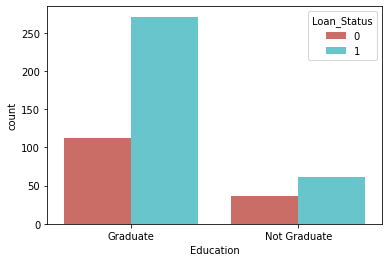

In [36]:
# check the education and the loan status
sns.countplot(x='Education', hue='Loan_Status', data=loan_data, palette="hls")
plt.show()

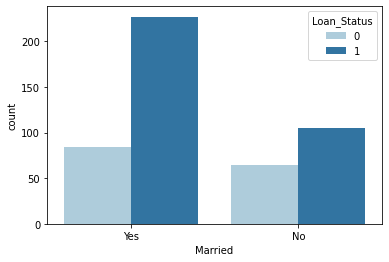

In [40]:
# maritel status and teh loan
sns.countplot(x='Married',hue='Loan_Status',data=loan_data, palette="Paired")

In [44]:
# convert categorical colums to numerical values 
loan_data.replace({'Married':{'No':0, 'Yes':1},
                   'Gender':{'Male':1, 'Female':0},
                   'Self_Employed':{'No':0, 'Yes':1},
                   'Property_Area':{'Rural':0, 'Semiurban':1, 
                                    'Urban':2},
                   'Education':{'Graduate':1, 'Not Graduate':0} 
                   }, inplace=True)


In [45]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [46]:
# separating the data and label
X = loan_data.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
Y = loan_data['Loan_Status']

In [47]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

**Train Test Data Split**

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,
                                                   stratify=Y, random_state=2)

In [50]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


**Training the model**

Support vector Machine Model

In [52]:
svm_classifier = SVC(kernel= 'linear')

In [53]:
# training the support vector model
svm_classifier.fit(X_train, Y_train)

SVC(kernel='linear')

**Model Evaluation**

In [55]:
# accuracy score on training data
X_train_prediction = svm_classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [56]:
print('Accuracy on training data:\n',training_data_accuracy)

Accuracy on training data:
 0.7786458333333334


In [62]:
# Accuracy score on test data
X_test_prediction = svm_classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [63]:
print('Accuracy on training data:\n',test_data_accuracy)

Accuracy on training data:
 0.8125


**End SVM model**